In [1]:
pip install textblob

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from textblob import TextBlob
import warnings
warnings.filterwarnings('ignore')
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [3]:
from google.colab import files
uploaded = files.upload()

Saving Amazon_Reviews_Oneplus_Nord_CE2.csv to Amazon_Reviews_Oneplus_Nord_CE2.csv


In [4]:
data = pd.read_csv('Amazon_Reviews_Oneplus_Nord_CE2.csv' , encoding='latin1')
data

,Unnamed: 0,Rating,Title,Review,Review_Date
0,0,1.0,Worst phone ever,Hang problem,25 February 2022
1,1,2.0,Ok !!! Not up to the mark,I'm writing this review after using 3days !!!B...,26 February 2022
2,2,5.0,Awesome look,Camera is so good n very fast phone back look ...,25 February 2022
3,3,3.0,One plus losing is originality!!!,The media could not be loaded.\n ...,28 February 2022
4,4,1.0,Read,I got my delivery on 23 feb when I unboxed the...,26 February 2022
...,...,...,...,...,...
4123,4123,1.0,Heating up,Heating up even for moderate use. Heat increas...,21 June 2022
4124,4124,5.0,Over all best,Very Nice,22 June 2022
4125,4125,1.0,Voice cut,All features are good but call cut frequently ...,16 June 2022
4126,4126,4.0,Battery backup is low,As it has fast charging but also drains the ba...,18 June 2022


In [5]:
data = data.drop(columns = 'Unnamed: 0')
data

,Rating,Title,Review,Review_Date
0,1.0,Worst phone ever,Hang problem,25 February 2022
1,2.0,Ok !!! Not up to the mark,I'm writing this review after using 3days !!!B...,26 February 2022
2,5.0,Awesome look,Camera is so good n very fast phone back look ...,25 February 2022
3,3.0,One plus losing is originality!!!,The media could not be loaded.\n ...,28 February 2022
4,1.0,Read,I got my delivery on 23 feb when I unboxed the...,26 February 2022
...,...,...,...,...
4123,1.0,Heating up,Heating up even for moderate use. Heat increas...,21 June 2022
4124,5.0,Over all best,Very Nice,22 June 2022
4125,1.0,Voice cut,All features are good but call cut frequently ...,16 June 2022
4126,4.0,Battery backup is low,As it has fast charging but also drains the ba...,18 June 2022


In [6]:
data.shape

(4128, 4)

In [7]:
data.Rating.describe()

count    4128.000000
mean        3.780766
std         1.487904
min         1.000000
25%         3.000000
50%         4.000000
75%         5.000000
max         5.000000
Name: Rating, dtype: float64

In [8]:
#Number of Words in single tweet
data['word_count'] = data['Review'].apply(lambda x: len(str(x).split(" ")))
data[['Review' , 'word_count']].head(10)


,Review,word_count
0,Hang problem,2
1,I'm writing this review after using 3days !!!B...,65
2,Camera is so good n very fast phone back look ...,170
3,The media could not be loaded.\n ...,197
4,I got my delivery on 23 feb when I unboxed the...,110
5,The media could not be loaded.\n ...,109
6,Nord CE 2 is a decent choice for someone looki...,456
7,Phone is over all good but some heating proble...,19
8,****Don't buy any phones from Amazon*** i real...,159
9,The media could not be loaded.\n ...,91


In [9]:
#Number of characters in single tweet
data['char_count'] = data['Review'].str.len() ## this also includes spaces
data[['Review','char_count']].head()

,Review,char_count
0,Hang problem,12.0
1,I'm writing this review after using 3days !!!B...,386.0
2,Camera is so good n very fast phone back look ...,882.0
3,The media could not be loaded.\n ...,974.0
4,I got my delivery on 23 feb when I unboxed the...,622.0


In [10]:
#Average Words in a review

def avg_words(sentence):
  words =str(sentence).split()
  return (sum(len(word)for word in words)/len(words))

data['avg_word'] = data['Review'].apply(lambda x: avg_words(x))
data[['Review','avg_word']].head(10)

,Review,avg_word
0,Hang problem,5.500000
1,I'm writing this review after using 3days !!!B...,4.953846
2,Camera is so good n very fast phone back look ...,4.194118
3,The media could not be loaded.\n ...,4.218579
4,I got my delivery on 23 feb when I unboxed the...,4.663636
5,The media could not be loaded.\n ...,4.947368
6,Nord CE 2 is a decent choice for someone looki...,4.809211
7,Phone is over all good but some heating proble...,4.526316
8,****Don't buy any phones from Amazon*** i real...,4.708861
9,The media could not be loaded.\n ...,4.129870


In [11]:
#counting words with Hashtag
data['hashtags'] = data['Review'].apply(lambda x: len([x for x in str(x).split() if x.startswith('#')]))
data[['Review','hashtags']].head()

,Review,hashtags
0,Hang problem,0
1,I'm writing this review after using 3days !!!B...,0
2,Camera is so good n very fast phone back look ...,0
3,The media could not be loaded.\n ...,0
4,I got my delivery on 23 feb when I unboxed the...,0


In [12]:
#counting Numerics

data['numerics'] = data['Review'].apply(lambda x: len([x for x in str(x).split() if x.isdigit()]))
data[['Review','numerics']].head()

,Review,numerics
0,Hang problem,0
1,I'm writing this review after using 3days !!!B...,0
2,Camera is so good n very fast phone back look ...,1
3,The media could not be loaded.\n ...,6
4,I got my delivery on 23 feb when I unboxed the...,1


In [13]:
#Counting upper words
data['upper'] = data['Review'].apply(lambda x: len([x for x in str(x).split() if x.isupper()]))
data[['Review','upper']].head()

,Review,upper
0,Hang problem,0
1,I'm writing this review after using 3days !!!B...,0
2,Camera is so good n very fast phone back look ...,2
3,The media could not be loaded.\n ...,14
4,I got my delivery on 23 feb when I unboxed the...,3


# **Spelling Correction**

In [14]:
from textblob import TextBlob
data['Review'][:5].apply(lambda x: str(TextBlob(x).correct()))

0                                         Sang problem
1    I'm writing this review after using days !!!He...
2    Camera is so good n very fast phone back look ...
3    The media could not be loaded.\n              ...
4    I got my delivery on 23 feb when I unvexed the...
Name: Review, dtype: object

## **Feature Engineering**

In [15]:
#splitting the 'Review_Date' column
print(data['Review_Date'].str.split(' ').str[0],'\n',
      data['Review_Date'].str.split(' ').str[1],'\n',
      data['Review_Date'].str.split(' ').str[2])

0       25
1       26
2       25
3       28
4       26
        ..
4123    21
4124    22
4125    16
4126    18
4127    20
Name: Review_Date, Length: 4128, dtype: object 
 0       February
1       February
2       February
3       February
4       February
          ...   
4123        June
4124        June
4125        June
4126        June
4127        June
Name: Review_Date, Length: 4128, dtype: object 
 0       2022
1       2022
2       2022
3       2022
4       2022
        ... 
4123    2022
4124    2022
4125    2022
4126    2022
4127    2022
Name: Review_Date, Length: 4128, dtype: object


# **Catergorizing Date in to Day/Month/Year columns**

In [16]:
df=data.copy()
df['Date']=df['Review_Date'].str.split(' ').str[0]
df['Month']=df['Review_Date'].str.split(' ').str[1]
df['Year']=df['Review_Date'].str.split(' ').str[2]
df[['Date','Month','Year']]

,Date,Month,Year
0,25,February,2022
1,26,February,2022
2,25,February,2022
3,28,February,2022
4,26,February,2022
...,...,...,...
4123,21,June,2022
4124,22,June,2022
4125,16,June,2022
4126,18,June,2022


In [17]:
df.Month.value_counts()

March       1321
April       1183
May          803
June         540
February     281
Name: Month, dtype: int64

In [18]:
order={'Month':{'February':2,'March':3,'April':4,'May':5,'June':6}}
df1= df.copy()
df1=df1.replace(order)
df1[['Month']]

,Month
0,2
1,2
2,2
3,2
4,2
...,...
4123,6
4124,6
4125,6
4126,6


In [19]:
df1.shape

(4128, 13)

In [20]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4128 entries, 0 to 4127
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Rating       4128 non-null   float64
 1   Title        4128 non-null   object 
 2   Review       3893 non-null   object 
 3   Review_Date  4128 non-null   object 
 4   word_count   4128 non-null   int64  
 5   char_count   3893 non-null   float64
 6   avg_word     4128 non-null   float64
 7   hashtags     4128 non-null   int64  
 8   numerics     4128 non-null   int64  
 9   upper        4128 non-null   int64  
 10  Date         4128 non-null   object 
 11  Month        4128 non-null   int64  
 12  Year         4128 non-null   object 
dtypes: float64(3), int64(5), object(5)
memory usage: 419.4+ KB


In [21]:
df1[['Date','Year']]=df1[['Date','Year']].astype('int64')
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4128 entries, 0 to 4127
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Rating       4128 non-null   float64
 1   Title        4128 non-null   object 
 2   Review       3893 non-null   object 
 3   Review_Date  4128 non-null   object 
 4   word_count   4128 non-null   int64  
 5   char_count   3893 non-null   float64
 6   avg_word     4128 non-null   float64
 7   hashtags     4128 non-null   int64  
 8   numerics     4128 non-null   int64  
 9   upper        4128 non-null   int64  
 10  Date         4128 non-null   int64  
 11  Month        4128 non-null   int64  
 12  Year         4128 non-null   int64  
dtypes: float64(3), int64(7), object(3)
memory usage: 419.4+ KB


# **Drop the orginal columns**

In [22]:
df1.drop('Review_Date',axis=1, inplace=True)
df1

,Rating,Title,Review,word_count,char_count,avg_word,hashtags,numerics,upper,Date,Month,Year
0,1.0,Worst phone ever,Hang problem,2,12.0,5.500000,0,0,0,25,2,2022
1,2.0,Ok !!! Not up to the mark,I'm writing this review after using 3days !!!B...,65,386.0,4.953846,0,0,0,26,2,2022
2,5.0,Awesome look,Camera is so good n very fast phone back look ...,170,882.0,4.194118,0,1,2,25,2,2022
3,3.0,One plus losing is originality!!!,The media could not be loaded.\n ...,197,974.0,4.218579,0,6,14,28,2,2022
4,1.0,Read,I got my delivery on 23 feb when I unboxed the...,110,622.0,4.663636,0,1,3,26,2,2022
...,...,...,...,...,...,...,...,...,...,...,...,...
4123,1.0,Heating up,Heating up even for moderate use. Heat increas...,41,254.0,5.487179,0,1,2,21,6,2022
4124,5.0,Over all best,Very Nice,2,9.0,4.000000,0,0,0,22,6,2022
4125,1.0,Voice cut,All features are good but call cut frequently ...,16,93.0,4.875000,0,0,0,16,6,2022
4126,4.0,Battery backup is low,As it has fast charging but also drains the ba...,12,62.0,4.250000,0,0,0,18,6,2022


In [23]:
df

,Rating,Title,Review,Review_Date,word_count,char_count,avg_word,hashtags,numerics,upper,Date,Month,Year
0,1.0,Worst phone ever,Hang problem,25 February 2022,2,12.0,5.500000,0,0,0,25,February,2022
1,2.0,Ok !!! Not up to the mark,I'm writing this review after using 3days !!!B...,26 February 2022,65,386.0,4.953846,0,0,0,26,February,2022
2,5.0,Awesome look,Camera is so good n very fast phone back look ...,25 February 2022,170,882.0,4.194118,0,1,2,25,February,2022
3,3.0,One plus losing is originality!!!,The media could not be loaded.\n ...,28 February 2022,197,974.0,4.218579,0,6,14,28,February,2022
4,1.0,Read,I got my delivery on 23 feb when I unboxed the...,26 February 2022,110,622.0,4.663636,0,1,3,26,February,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4123,1.0,Heating up,Heating up even for moderate use. Heat increas...,21 June 2022,41,254.0,5.487179,0,1,2,21,June,2022
4124,5.0,Over all best,Very Nice,22 June 2022,2,9.0,4.000000,0,0,0,22,June,2022
4125,1.0,Voice cut,All features are good but call cut frequently ...,16 June 2022,16,93.0,4.875000,0,0,0,16,June,2022
4126,4.0,Battery backup is low,As it has fast charging but also drains the ba...,18 June 2022,12,62.0,4.250000,0,0,0,18,June,2022


# **Visualization**

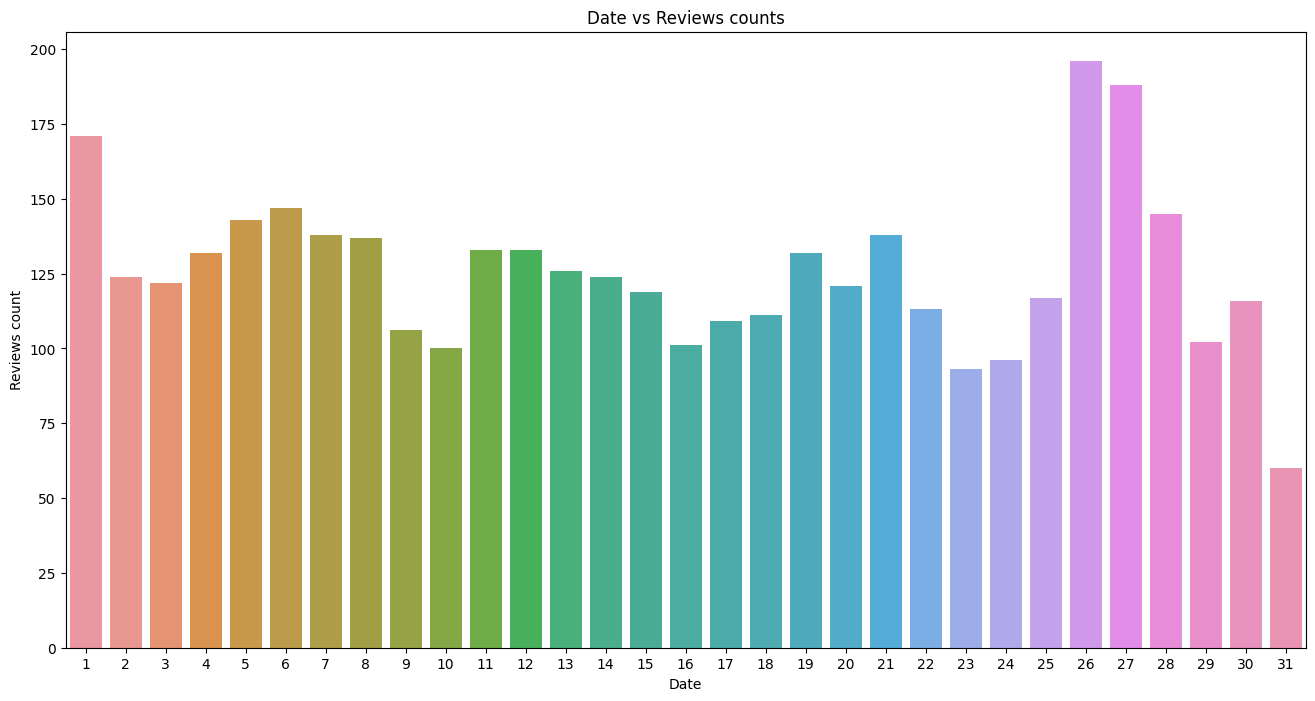

In [24]:
#Creating a dataframe
dayreview = pd.DataFrame(df.groupby('Date')['Review'].count()).reset_index()
dayreview['Date'] = dayreview['Date'].astype('int64')
dayreview.sort_values(by = ['Date'])

#Plotting the graph
plt.figure(figsize=(16,8))
sns.barplot(x = "Date", y = "Review", data = dayreview)
plt.title('Date vs Reviews counts')
plt.xlabel('Date')
plt.ylabel('Reviews count')
plt.show()

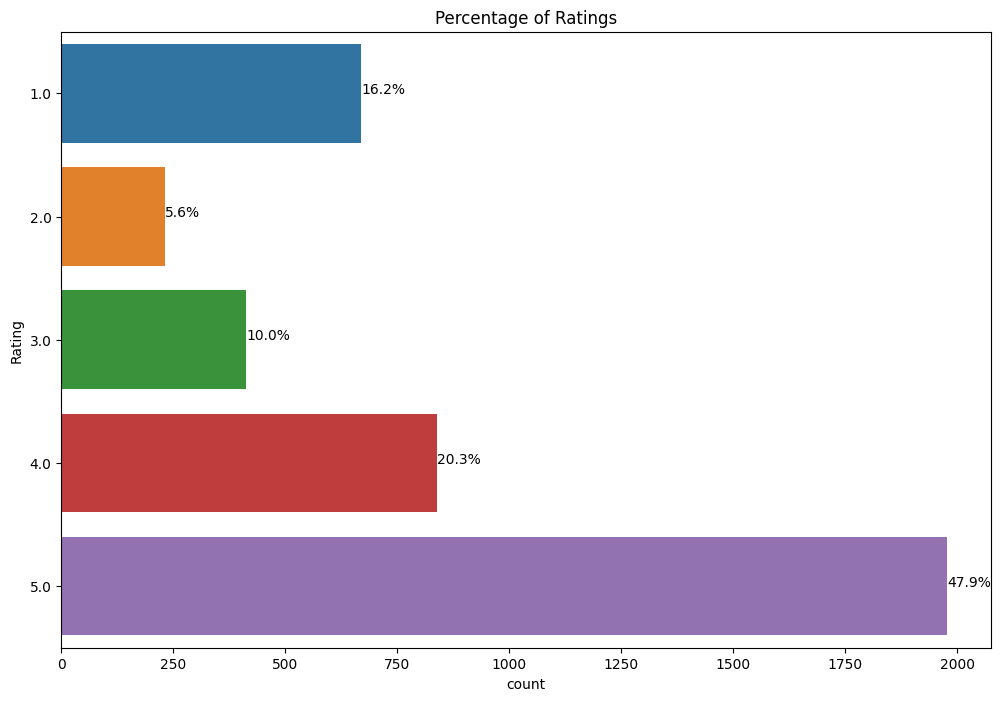

In [25]:
plt.figure(figsize=(12,8))
plt.title('Percentage of Ratings')
ax = sns.countplot(y = 'Rating', data = data)
total = len(data)
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

## **preproccessing for sentimental analysis**

In [26]:
data=df[['Review']]
data

,Review
0,Hang problem
1,I'm writing this review after using 3days !!!B...
2,Camera is so good n very fast phone back look ...
3,The media could not be loaded.\n ...
4,I got my delivery on 23 feb when I unboxed the...
...,...
4123,Heating up even for moderate use. Heat increas...
4124,Very Nice
4125,All features are good but call cut frequently ...
4126,As it has fast charging but also drains the ba...


In [27]:

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
data['Review'] = data['Review'].apply(lambda x: " ".join(x.lower() for x in str(x).split() \
                                    if x not in stop_words))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [28]:
data

,Review
0,hang problem
1,i'm writing review using 3days !!!be honest no...
2,camera good n fast phone back look awesomewith...
3,the media could loaded. â itâs a average pro...
4,i got delivery 23 feb i unboxed phone display ...
...,...
4123,heating even moderate use. heat increases use ...
4124,very nice
4125,all features good call cut frequently also voi...
4126,as fast charging also drains battery fast.


In [29]:

nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
import re
from tqdm.notebook import tqdm_notebook
lemmatizer = WordNetLemmatizer()
# Removing punctuation, making str to lower, applying Lemmatizer, Removing Stop words
corpus=[]
for i in tqdm_notebook(range(0, len(data))):
    cleaned= re.sub('[^a-zA-Z]', " ", data["Review"][i])
    cleaned= cleaned.lower()
    cleaned = cleaned.split()
    cleaned= [lemmatizer.lemmatize(word) for word in cleaned if word not in stopwords.words("english")]
    cleaned= ' '.join(cleaned)
    corpus.append(cleaned)

[nltk_data] Downloading package wordnet to /root/nltk_data...


  0%|          | 0/4128 [00:00<?, ?it/s]

In [30]:
#Saving cleaned data to compare with original data, to ckeck amount of information lost
dataframe = pd.DataFrame({"Clean_Reviews": corpus,"Uncleaned_Reviews": df.Review})
dataframe.head()

,Clean_Reviews,Uncleaned_Reviews
0,hang problem,Hang problem
1,writing review using day honest normal android...,I'm writing this review after using 3days !!!B...
2,camera good n fast phone back look awesomewith...,Camera is so good n very fast phone back look ...
3,medium could loaded average product decent day...,The media could not be loaded.\n ...
4,got delivery feb unboxed phone display damaged...,I got my delivery on 23 feb when I unboxed the...


# Removing @Names

In [31]:
def remove_pattern(text, pattern_regex):
    r = re.findall(pattern_regex, text)
    for i in r:
        text = re.sub(i, '', text)

    return text

In [32]:
# We are keeping cleaned tweets in a new column called 'tidy_tweets'
dataframe['Clean_Reviews'] = np.vectorize(remove_pattern)(dataframe['Clean_Reviews'], "@[\w]*")
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,hang problem,Hang problem
1,writing review using day honest normal android...,I'm writing this review after using 3days !!!B...
2,camera good n fast phone back look awesomewith...,Camera is so good n very fast phone back look ...
3,medium could loaded average product decent day...,The media could not be loaded.\n ...
4,got delivery feb unboxed phone display damaged...,I got my delivery on 23 feb when I unboxed the...
5,medium could loaded phone fab sometime apps li...,The media could not be loaded.\n ...
6,nord ce decent choice someone looking upgrade ...,Nord CE 2 is a decent choice for someone looki...
7,phone good heating problem selfie good wise ph...,Phone is over all good but some heating proble...
8,buy phone amazon really bad exp dislike k poor...,****Don't buy any phones from Amazon*** i real...
9,medium could loaded grey mirror finish really ...,The media could not be loaded.\n ...


# Removing Links

In [33]:
cleaned_reviews = []

for index, row in dataframe.iterrows():
    # Here we are filtering out all the words that contains link
    words_without_links = [word for word in row.Clean_Reviews.split() if 'http' not in word]
    cleaned_reviews.append(' '.join(words_without_links))

dataframe['Clean_Reviews'] = cleaned_reviews
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,hang problem,Hang problem
1,writing review using day honest normal android...,I'm writing this review after using 3days !!!B...
2,camera good n fast phone back look awesomewith...,Camera is so good n very fast phone back look ...
3,medium could loaded average product decent day...,The media could not be loaded.\n ...
4,got delivery feb unboxed phone display damaged...,I got my delivery on 23 feb when I unboxed the...
5,medium could loaded phone fab sometime apps li...,The media could not be loaded.\n ...
6,nord ce decent choice someone looking upgrade ...,Nord CE 2 is a decent choice for someone looki...
7,phone good heating problem selfie good wise ph...,Phone is over all good but some heating proble...
8,buy phone amazon really bad exp dislike k poor...,****Don't buy any phones from Amazon*** i real...
9,medium could loaded grey mirror finish really ...,The media could not be loaded.\n ...


# Removing review with empty text

In [34]:
dataframe = dataframe[dataframe['Clean_Reviews']!='']
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,hang problem,Hang problem
1,writing review using day honest normal android...,I'm writing this review after using 3days !!!B...
2,camera good n fast phone back look awesomewith...,Camera is so good n very fast phone back look ...
3,medium could loaded average product decent day...,The media could not be loaded.\n ...
4,got delivery feb unboxed phone display damaged...,I got my delivery on 23 feb when I unboxed the...
5,medium could loaded phone fab sometime apps li...,The media could not be loaded.\n ...
6,nord ce decent choice someone looking upgrade ...,Nord CE 2 is a decent choice for someone looki...
7,phone good heating problem selfie good wise ph...,Phone is over all good but some heating proble...
8,buy phone amazon really bad exp dislike k poor...,****Don't buy any phones from Amazon*** i real...
9,medium could loaded grey mirror finish really ...,The media could not be loaded.\n ...


# **Dropping duplicated rows**

In [35]:
dataframe.drop_duplicates(subset=['Clean_Reviews'], keep=False)
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,hang problem,Hang problem
1,writing review using day honest normal android...,I'm writing this review after using 3days !!!B...
2,camera good n fast phone back look awesomewith...,Camera is so good n very fast phone back look ...
3,medium could loaded average product decent day...,The media could not be loaded.\n ...
4,got delivery feb unboxed phone display damaged...,I got my delivery on 23 feb when I unboxed the...
5,medium could loaded phone fab sometime apps li...,The media could not be loaded.\n ...
6,nord ce decent choice someone looking upgrade ...,Nord CE 2 is a decent choice for someone looki...
7,phone good heating problem selfie good wise ph...,Phone is over all good but some heating proble...
8,buy phone amazon really bad exp dislike k poor...,****Don't buy any phones from Amazon*** i real...
9,medium could loaded grey mirror finish really ...,The media could not be loaded.\n ...


In [36]:
##Resetting index

dataframe = dataframe.reset_index(drop=True)
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,hang problem,Hang problem
1,writing review using day honest normal android...,I'm writing this review after using 3days !!!B...
2,camera good n fast phone back look awesomewith...,Camera is so good n very fast phone back look ...
3,medium could loaded average product decent day...,The media could not be loaded.\n ...
4,got delivery feb unboxed phone display damaged...,I got my delivery on 23 feb when I unboxed the...
5,medium could loaded phone fab sometime apps li...,The media could not be loaded.\n ...
6,nord ce decent choice someone looking upgrade ...,Nord CE 2 is a decent choice for someone looki...
7,phone good heating problem selfie good wise ph...,Phone is over all good but some heating proble...
8,buy phone amazon really bad exp dislike k poor...,****Don't buy any phones from Amazon*** i real...
9,medium could loaded grey mirror finish really ...,The media could not be loaded.\n ...


# Removing stopwords

In [37]:
from google.colab import files

# Upload the stop.txt file
uploaded = files.upload()

Saving stop.txt to stop.txt


In [38]:
import codecs
with codecs.open(r"stop.txt", encoding="ISO-8859-1") as s:
    stop = s.read()
    print(stop[:101])

a
a's
able
about
above
according
accordingly
across
actually
after
afterwards
again
again


In [39]:
stop.split(" ")

["a\r\na's\r\nable\r\nabout\r\nabove\r\naccording\r\naccordingly\r\nacross\r\nactually\r\nafter\r\nafterwards\r\nagain\r\nagainst\r\nain't\r\nall\r\nallow\r\nallows\r\nalmost\r\nalone\r\nalong\r\nalready\r\nalso\r\nalthough\r\nalways\r\nam\r\namong\r\namongst\r\nan\r\nand\r\nanother\r\nany\r\nanybody\r\nanyhow\r\nanyone\r\nanything\r\nanyway\r\nanyways\r\nanywhere\r\napart\r\nappear\r\nappreciate\r\nappropriate\r\nare\r\naren't\r\naround\r\nas\r\naside\r\nask\r\nasking\r\nassociated\r\nat\r\navailable\r\naway\r\nawfully\r\nb\r\nbe\r\nbecame\r\nbecause\r\nbecome\r\nbecomes\r\nbecoming\r\nbeen\r\nbefore\r\nbeforehand\r\nbehind\r\nbeing\r\nbelieve\r\nbelow\r\nbeside\r\nbesides\r\nbest\r\nbetter\r\nbetween\r\nbeyond\r\nboth\r\nbrief\r\nbut\r\nby\r\nc\r\nc'mon\r\nc's\r\ncame\r\ncan\r\ncan't\r\ncannot\r\ncant\r\ncause\r\ncauses\r\ncertain\r\ncertainly\r\nchanges\r\nclearly\r\nco\r\ncom\r\ncome\r\ncomes\r\nconcerning\r\nconsequently\r\nconsider\r\nconsidering\r\ncontain\r\ncontaining\r\nconta

In [40]:
from nltk.corpus import stopwords
my_stop_words=stopwords.words('english')
sw_list = [stop]
my_stop_words.extend(sw_list)
stopwords_set = set(my_stop_words)
cleaned_tweets = []

for index, row in dataframe.iterrows():

    # filerting out all the stopwords
    words_without_stopwords = [word for word in row.Clean_Reviews.split() if not word in stopwords_set and '#' not in word.lower()]

    # finally creating tweets list of tuples containing stopwords(list) and sentimentType
    cleaned_tweets.append(' '.join(words_without_stopwords))

dataframe['Clean_Reviews'] = cleaned_tweets
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,hang problem,Hang problem
1,writing review using day honest normal android...,I'm writing this review after using 3days !!!B...
2,camera good n fast phone back look awesomewith...,Camera is so good n very fast phone back look ...
3,medium could loaded average product decent day...,The media could not be loaded.\n ...
4,got delivery feb unboxed phone display damaged...,I got my delivery on 23 feb when I unboxed the...
5,medium could loaded phone fab sometime apps li...,The media could not be loaded.\n ...
6,nord ce decent choice someone looking upgrade ...,Nord CE 2 is a decent choice for someone looki...
7,phone good heating problem selfie good wise ph...,Phone is over all good but some heating proble...
8,buy phone amazon really bad exp dislike k poor...,****Don't buy any phones from Amazon*** i real...
9,medium could loaded grey mirror finish really ...,The media could not be loaded.\n ...


# Converting Words to stemmer

In [41]:
from nltk.stem.snowball import SnowballStemmer

# Use English stemmer.
stemmer = SnowballStemmer("english")

In [42]:
xx = pd.DataFrame()
xx['stemmed'] = dataframe['Clean_Reviews'].apply(lambda x: " ".join([stemmer.stem(word) for word in x.split()]))
xx

,stemmed
0,hang problem
1,write review use day honest normal android pho...
2,camera good n fast phone back look awesomewith...
3,medium could load averag product decent day da...
4,got deliveri feb unbox phone display damag req...
...,...
4080,heat even moder use heat increas use mobil int...
4081,nice
4082,featur good call cut frequent also voic cut ta...
4083,fast charg also drain batteri fast


# **Applying Bag of words with N grams**

In [43]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
tweetscv=cv.fit_transform(dataframe.Clean_Reviews)

In [44]:
print(cv.vocabulary_)

{'hang': 1755, 'problem': 3131, 'writing': 4507, 'review': 3470, 'using': 4275, 'day': 964, 'honest': 1853, 'normal': 2678, 'android': 144, 'phoneit': 2987, 'like': 2259, 'onepluscamera': 2760, 'quality': 3225, 'low': 2335, 'say': 3553, 'mp': 2572, 'notsound': 2689, 'also': 104, 'lowbattery': 2337, 'backup': 308, 'ok': 2728, 'one': 2755, 'use': 4264, 'itsif': 2064, 'ur': 4252, 'gamer': 1584, 'go': 1642, 'itoverall': 2062, 'price': 3113, 'high': 1823, 'handsetif': 1751, 'really': 3314, 'wanna': 4365, 'buy': 568, 'oneplus': 2759, 'ho': 1840, 'higher': 1824, 'end': 1243, 'modeli': 2539, 'first': 1474, 'time': 4095, 'buying': 574, 'onepluslittle': 2766, 'disappointment': 1097, 'camera': 599, 'good': 1648, 'fast': 1397, 'phone': 2974, 'back': 300, 'look': 2309, 'awesomewith': 287, 'dis': 1086, 'segment': 3601, 'worth': 4491, 'important': 1922, 'thing': 4066, 'dedicated': 986, 'memory': 2439, 'card': 633, 'slot': 3741, 'think': 4069, 'plus': 3040, 'cardbattery': 634, 'wit': 4458, 'help': 180

In [45]:
print(cv.get_feature_names_out()[109:200])

['although' 'aluminium' 'always' 'amaaaazziingg' 'amaze' 'amazed'
 'amazing' 'amazingeverything' 'amazingly' 'amazoing' 'amazon' 'amazonall'
 'amazoncoming' 'amazone' 'amazonthey' 'ambient' 'ambition' 'amd' 'amej'
 'amezing' 'amezon' 'ammount' 'amoled' 'amonth' 'amotions' 'amount'
 'amountdon' 'amountone' 'amozn' 'ample' 'analysis' 'andar' 'ande' 'ander'
 'andorid' 'android' 'androidneed' 'angel' 'angle' 'angry' 'animation'
 'annonce' 'announce' 'announced' 'announcement' 'announces' 'annoyed'
 'annoying' 'another' 'answer' 'answered' 'anybody' 'anymore' 'anyone'
 'anything' 'anytime' 'anyway' 'anywhere' 'aod' 'aor' 'ap' 'apan' 'apart'
 'aperture' 'apk' 'apki' 'app' 'apparently' 'appcamera' 'appear'
 'appearance' 'apperance' 'apple' 'applicable' 'application' 'applied'
 'apply' 'applying' 'appo' 'appreciate' 'appropriate' 'approx'
 'approximately' 'apps' 'appssince' 'appx' 'apr' 'april' 'aprrox' 'apt'
 'apx']


In [46]:
print(cv.get_feature_names_out()[:100])

['aa' 'aaa' 'aacha' 'aaj' 'aap' 'aapko' 'aawaj' 'aaya' 'aayega' 'aayi'
 'ab' 'abhi' 'abides' 'able' 'abnormal' 'abou' 'absent' 'absolute'
 'absolutely' 'absurd' 'abt' 'accept' 'acceptable' 'accepted' 'accepting'
 'accesories' 'access' 'accessing' 'accessory' 'accha' 'accilent'
 'accommodated' 'accomodate' 'accomplished' 'according' 'accordingbrand'
 'accpet' 'accuracy' 'accurate' 'acha' 'achcha' 'achche' 'achha'
 'achieved' 'act' 'action' 'activation' 'active' 'activity' 'actual'
 'actually' 'ad' 'adapter' 'adaption' 'adaptor' 'add' 'added' 'addicted'
 'adding' 'additional' 'address' 'adequate' 'admit' 'adopted' 'adore'
 'advance' 'advanced' 'advantage' 'advertised' 'advertisement' 'advice'
 'advisor' 'aesthetic' 'afford' 'affordable' 'afterwards' 'agai' 'agar'
 'agent' 'aggregation' 'ago' 'agree' 'ahead' 'ai' 'aince' 'aisa' 'aisi'
 'aitam' 'alag' 'albeit' 'album' 'alert' 'alexa' 'alignment' 'allover'
 'allow' 'allram' 'almost' 'along' 'alot']


In [47]:
print(tweetscv.toarray()[100:200])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


# CountVectorizer with N grams

In [48]:
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
ps = PorterStemmer()
corpus = []
for i in tqdm_notebook(range(0, len(dataframe))):
    review = re.sub('[^a-zA-Z]', ' ', dataframe['Clean_Reviews'][i])
    review = review.lower()
    review = review.split()

    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

  0%|          | 0/4085 [00:00<?, ?it/s]

In [49]:
corpus[3]

'medium could load averag product decent day day activ one thing would like mention exchang far far alot good amazon like minut deliveri agent good although scratch neglect minor scratch exchang poco pro gb variant exchang rupe bought half year ago sold good price plu point amazoncom back devic would say ok devic camera averag perform fine one plu lose origin oxygen color warp charger vooc charger ye taken oppo wish way believ one plu chang one plu fan want merg brand pleas keep origin maintain thanx amazon hasselfre exchang alot better flipkart'

In [50]:
## Applying Countvectorizer
# Creating the Bag of Words model
cv = CountVectorizer(max_features=5000,ngram_range=(1,3))
X = cv.fit_transform(corpus).toarray()

In [51]:
X.shape

(4085, 5000)

In [52]:
cv.get_feature_names_out()[:20]

array(['aa', 'aap', 'ab', 'abl', 'absolut', 'accept', 'access',
       'accessori', 'accha', 'accord', 'accord price', 'accur', 'acha',
       'activ', 'actual', 'ad', 'adapt', 'add', 'addit', 'advantag'],
      dtype=object)

In [53]:
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [54]:
count_df = pd.DataFrame(X, columns=cv.get_feature_names_out())
count_df

,aa,aap,ab,abl,absolut,accept,access,accessori,accha,accord,...,year batteri,year old,year secur,year secur updat,yellow,yet,youtub,youtub review,yr,zoom
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4080,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4081,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4082,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4083,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# TF-IDF Vectorizer

In [55]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from tqdm.notebook import tqdm_notebook
ps = PorterStemmer()
corpus = []
for i in tqdm_notebook(range(0, len(dataframe))):
    review = re.sub('[^a-zA-Z]', ' ', dataframe['Clean_Reviews'][i])
    review = review.lower()
    review = review.split()

    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

  0%|          | 0/4085 [00:00<?, ?it/s]

In [56]:
corpus[4]

'got deliveri feb unbox phone display damag request replac new phone technician suppos come inspect instead visit talk call ask instal applic even saw damag display screen let hope amazon right replac phone updat rest later amazon pl consid request replac item soon possibleedit phone perfect replac everyth perfect camera qualiti expect perfectoveral perform bestyou go'

In [58]:
## TFidf Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_v=TfidfVectorizer(max_features=5000,ngram_range=(1,3))
X=tfidf_v.fit_transform(corpus).toarray()

In [59]:
X.shape

(4085, 5000)

In [60]:
tfidf_v.get_feature_names_out()[:20]

array(['aa', 'aap', 'ab', 'abl', 'absolut', 'accept', 'access',
       'accessori', 'accha', 'accord', 'accord price', 'accur', 'acha',
       'activ', 'actual', 'ad', 'adapt', 'add', 'addit', 'advantag'],
      dtype=object)

In [61]:
tfidf_v.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': None,
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'use_idf': True,
 'vocabulary': None}

In [62]:
count_df = pd.DataFrame(X, columns=tfidf_v.get_feature_names_out())
count_df

,aa,aap,ab,abl,absolut,accept,access,accessori,accha,accord,...,year batteri,year old,year secur,year secur updat,yellow,yet,youtub,youtub review,yr,zoom
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4080,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4081,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4082,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4083,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Named Entity Recognition(NER)

In [63]:
data=[review.strip() for data in dataframe.Clean_Reviews] # remove both the leading and the trailing characters
data=[comment for comment in data if comment] # removes empty strings, because they are considered in Python as False
# Joining the list into one string/text
reviews_text=' '.join(data)
reviews_text[0:1000]

'nice color camera awsom lag oleas updat phone use nice color camera awsom lag oleas updat phone use nice color camera awsom lag oleas updat phone use nice color camera awsom lag oleas updat phone use nice color camera awsom lag oleas updat phone use nice color camera awsom lag oleas updat phone use nice color camera awsom lag oleas updat phone use nice color camera awsom lag oleas updat phone use nice color camera awsom lag oleas updat phone use nice color camera awsom lag oleas updat phone use nice color camera awsom lag oleas updat phone use nice color camera awsom lag oleas updat phone use nice color camera awsom lag oleas updat phone use nice color camera awsom lag oleas updat phone use nice color camera awsom lag oleas updat phone use nice color camera awsom lag oleas updat phone use nice color camera awsom lag oleas updat phone use nice color camera awsom lag oleas updat phone use nice color camera awsom lag oleas updat phone use nice color camera awsom lag oleas updat phone use

# Feature Extraction of Key Words

In [65]:
# BOW features
bow_word_vectorizer = CountVectorizer(max_df=0.90, min_df=2, stop_words='english')
# bag-of-words feature matrix
bow_word_feature = bow_word_vectorizer.fit_transform(dataframe['Clean_Reviews'])

# TF-IDF features
tfidf_word_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, stop_words='english')
# TF-IDF feature matrix
tfidf_word_feature = tfidf_word_vectorizer.fit_transform(dataframe['Clean_Reviews'])

# Fetch Sentiments

In [66]:
# 1 way
def fetch_sentiment_using_SIA(text):
    sid = SentimentIntensityAnalyzer()
    polarity_scores = sid.polarity_scores(text)
    return 'neg' if polarity_scores['neg'] > polarity_scores['pos'] else 'pos'

# 2 way
def fetch_sentiment_using_textblob(text):
    analysis = TextBlob(text)
    return 'pos' if analysis.sentiment.polarity >= 0 else 'neg'

In [68]:
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sentiments_using_SIA = dataframe.Clean_Reviews.apply(lambda tweet: fetch_sentiment_using_SIA(tweet))
pd.DataFrame(sentiments_using_SIA.value_counts())

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


,Clean_Reviews
pos,3512
neg,573


In [69]:
dataframe.Clean_Reviews[8]

'buy phone amazon really bad exp dislike k poor build quality configuration real etc coming le k brand buy k audio worst single speaker volume low call end think phone mic issue back camera good phone touch also felt bit lack like fast charging within min charge front cam bit okay battery backup good g band support dual g standby oneplus promise something back camera quality audio improvement update buy offer otherwise go real gt master pro pro plus moto mobile also good using moto year good camera sound took two drawback phone rest okay manageble return policy replacement'

In [70]:
sid = SentimentIntensityAnalyzer()
sid.polarity_scores(dataframe.Clean_Reviews[8])

{'neg': 0.147, 'neu': 0.613, 'pos': 0.24, 'compound': 0.8148}

In [71]:
df=pd.DataFrame()
df['Review'] = dataframe.Clean_Reviews
df['scores'] = dataframe['Clean_Reviews'].apply(lambda review: sid.polarity_scores(review))
df.head()

,Review,scores
0,hang problem,"{'neg': 0.73, 'neu': 0.27, 'pos': 0.0, 'compou..."
1,writing review using day honest normal android...,"{'neg': 0.103, 'neu': 0.744, 'pos': 0.153, 'co..."
2,camera good n fast phone back look awesomewith...,"{'neg': 0.0, 'neu': 0.697, 'pos': 0.303, 'comp..."
3,medium could loaded average product decent day...,"{'neg': 0.051, 'neu': 0.648, 'pos': 0.301, 'co..."
4,got delivery feb unboxed phone display damaged...,"{'neg': 0.088, 'neu': 0.695, 'pos': 0.217, 'co..."


In [72]:
df['compound']  = df['scores'].apply(lambda scores: scores['compound'])
df.head()

,Review,scores,compound
0,hang problem,"{'neg': 0.73, 'neu': 0.27, 'pos': 0.0, 'compou...",-0.4019
1,writing review using day honest normal android...,"{'neg': 0.103, 'neu': 0.744, 'pos': 0.153, 'co...",0.3818
2,camera good n fast phone back look awesomewith...,"{'neg': 0.0, 'neu': 0.697, 'pos': 0.303, 'comp...",0.9854
3,medium could loaded average product decent day...,"{'neg': 0.051, 'neu': 0.648, 'pos': 0.301, 'co...",0.9729
4,got delivery feb unboxed phone display damaged...,"{'neg': 0.088, 'neu': 0.695, 'pos': 0.217, 'co...",0.7845


In [77]:
df['sentiment'] = df['compound'].apply(lambda c: 'Positive' if c >=0.05 else ('Negative' if c<=-0.05  else 'Neutral'))
df

,Review,scores,compound,sentiment
0,hang problem,"{'neg': 0.73, 'neu': 0.27, 'pos': 0.0, 'compou...",-0.4019,Negative
1,writing review using day honest normal android...,"{'neg': 0.103, 'neu': 0.744, 'pos': 0.153, 'co...",0.3818,Positive
2,camera good n fast phone back look awesomewith...,"{'neg': 0.0, 'neu': 0.697, 'pos': 0.303, 'comp...",0.9854,Positive
3,medium could loaded average product decent day...,"{'neg': 0.051, 'neu': 0.648, 'pos': 0.301, 'co...",0.9729,Positive
4,got delivery feb unboxed phone display damaged...,"{'neg': 0.088, 'neu': 0.695, 'pos': 0.217, 'co...",0.7845,Positive
...,...,...,...,...
4080,heating even moderate use heat increase use mo...,"{'neg': 0.0, 'neu': 0.916, 'pos': 0.084, 'comp...",0.3182,Positive
4081,nice,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...",0.4215,Positive
4082,feature good call cut frequently also voice cu...,"{'neg': 0.298, 'neu': 0.496, 'pos': 0.206, 'co...",-0.0772,Negative
4083,fast charging also drain battery fast,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral


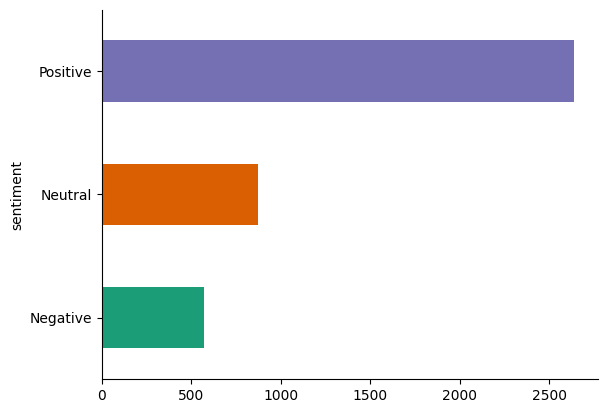

In [78]:
from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('sentiment').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [74]:
from collections import defaultdict
from plotly import tools
from plotly.offline import iplot
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))
import plotly.graph_objects as go
#Filtering data
positive_review = df[df["sentiment"]=='Positive'].dropna()
neutral_review = df[df["sentiment"]=='Neutral'].dropna()
negative_review = df[df["sentiment"]=='Negative'].dropna()

## custom function for ngram generation ##
def generate_ngrams(text, n_gram = 1):
    token = [token for token in text.lower().split(" ") if token != "" if token not in STOPWORDS]
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [" ".join(ngram) for ngram in ngrams]

# custom function for horizontal bar chart ##
def horizontal_bar_chart(df, color):
    trace = go.Bar(
        y =df["word"].values[::-1],
        x = df["wordcount"].values[::-1],
        showlegend = False,
        orientation = 'h',
        marker = dict(
            color = color,
        ),
    )
    return trace

## Get the bar chart from positive reviews ##
freq_dict = defaultdict(int)
for sent in positive_review["Review"]:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace0 = horizontal_bar_chart(fd_sorted.head(20), 'blue')


## Get the bar chart from neutral reviews ##
freq_dict = defaultdict(int)
for sent in neutral_review["Review"]:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace1 = horizontal_bar_chart(fd_sorted.head(20), 'purple')

## Get the bar chart from negative reviews ##
freq_dict = defaultdict(int)
for sent in negative_review["Review"]:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace2 = horizontal_bar_chart(fd_sorted.head(20), 'yellow')

# Creating two subplots
fig = tools.make_subplots(rows=3, cols=1, vertical_spacing = 0.04,
                          subplot_titles=["Frequent words of positive reviews", "Frequent words of neutral reviews",
                                          "Frequent words of negative reviews"])
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 2, 1)
fig.append_trace(trace2, 3, 1)
fig['layout'].update(height=1200, width=900, paper_bgcolor='rgb(233,233,233)', title="Word Count Plots")
iplot(fig, filename='word-plots')

/usr/local/lib/python3.10/dist-packages/plotly/tools.py:460: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead

